In [1]:
from datacube import Datacube

import xarray as xr
import rasterio
import rasterio.features
import geopandas as gp

import matplotlib.pyplot as plt

# Import the custom scripts. These can be found in the dea-notebooks repository.
import sys
import os.path
#sys.path.append(os.path.expanduser('~/dea-notebooks/10_Scripts'))
sys.path.append("..")
import DEAPlotting
import DEADataHandling

In [2]:
dc = Datacube(app='raster mask')
#Populating the interactive namespace from numpy and matplotlib
#Set up the extraction query

query = {'lat': (-35.310, -35.278),
         'lon': (149.056, 149.083),
         'time': ('2016-01-01', '2016-03-01')
         }

data, crs, affine = DEADataHandling.load_nbarx(dc, 'ls8', query,
                                               bands_of_interest=['blue', 'green', 'red'])

Loading ls8_nbart_albers
Loaded ls8_nbart_albers
Generating mask ls8_pq_albers


In [3]:
shape_file = os.path.expanduser('../ShapeFiles/FORESTS/Arboretum_Forest.shp')

shp = gp.read_file(shape_file)

# Reproject coordinate system of shape file
shp = shp.to_crs({'init': 'epsg:3577'})

In [4]:
mask = rasterio.features.rasterize(((feature['geometry'], 1) for feature in shp.iterfeatures()),
                                   out_shape=data.isel(time=0).green.shape,
                                   transform=data.green.affine
                                  )

# Convert the numpy array to a DataArray
mask = xr.DataArray(mask, coords=(data.y, data.x))

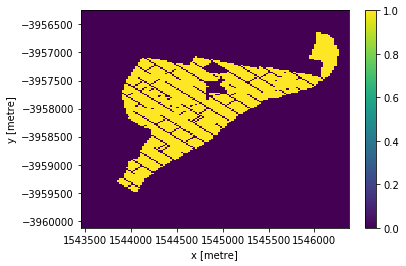

In [5]:
plt.figure()
mask.plot()

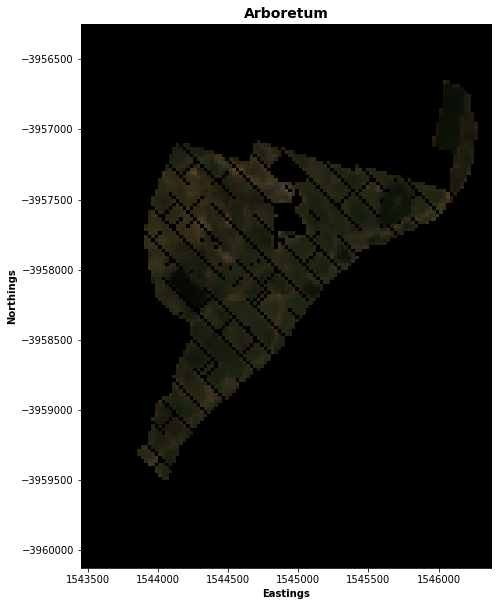

In [8]:
# Data * mask = data or nan
MaskedData = data.where(mask)

DEAPlotting.three_band_image(MaskedData, bands = ['red', 'green', 'blue'], time = 5, title = 'Arboretum');